In [1]:
#pip install fitter --user #install fitter library if needed. used in cells 9 and 10 to find best distributions

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#install'


In [2]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy
from scipy import stats
from fitter import Fitter

In [3]:
cases = pd.read_csv("../covid_confirmed_usafacts.csv")
deaths = pd.read_csv("../covid_deaths_usafacts.csv")
population = pd.read_csv("../Full_Covid_Data.csv")

### Use the state data (the state of your choice) generated in Stage II to fit a distribution to the number of COVID-19 cases.  (25 points)
- Graphically plot the distribution and describe the distribution statistics. If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that.
- Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the report and the notebook.
- Compare the distribution and its statistics to 5 other states of your choosing. Describe if the distributions look different and what does that imply.

In [4]:
# Functions for state stuffs
def parse_datetime_state(full_data, state):
    #get date range for chosen state
    state_data = full_data[full_data['State'] == state]
    dates_only = state_data.loc[:, '2020-07-05':'2020-12-27']
    #convert to datetime
    dates_only.columns = pd.to_datetime(dates_only.columns)
    return dates_only

def get_statistics(data_dates):
    weeks = [range(i, i+7) for i in range(0, len(data_dates.columns)-7, 7)]
    stats = pd.DataFrame({'week': [], 'mean' : [], 'median' : [], 'mode' : []})
    
    for w in range(len(weeks)) :
        week_start = data_dates.iloc[0, weeks[w]].keys()[0]
        week_sum = data_dates.iloc[:, weeks[w]].sum(axis=1)
        stats_row = pd.DataFrame({'week': week_start, 'mean' : week_sum.mean(), 'median' : week_sum.median(), 'mode' : week_sum.mode()})
        stats = pd.concat([stats, stats_row])
    return stats

In [5]:
state = 'SC'
norm_factor = 10000

pop_SC = population.loc[population["State"] == state]
pop_SC_sum = pop_SC['population'].sum()

cases_dates_SC = parse_datetime_state(cases, state)
deaths_dates_SC = parse_datetime_state(deaths, state)
cases_stats_SC = get_statistics(cases_dates_SC)
deaths_stats_SC = get_statistics(deaths_dates_SC)
cases_norm_SC = ((cases_dates_SC/(pop_SC_sum/norm_factor)).sum(axis = 0) + 1).agg(np.log10)
deaths_norm_SC = ((deaths_dates_SC/(pop_SC_sum/norm_factor)).sum(axis = 0) + 1).agg(np.log10)

cases SC


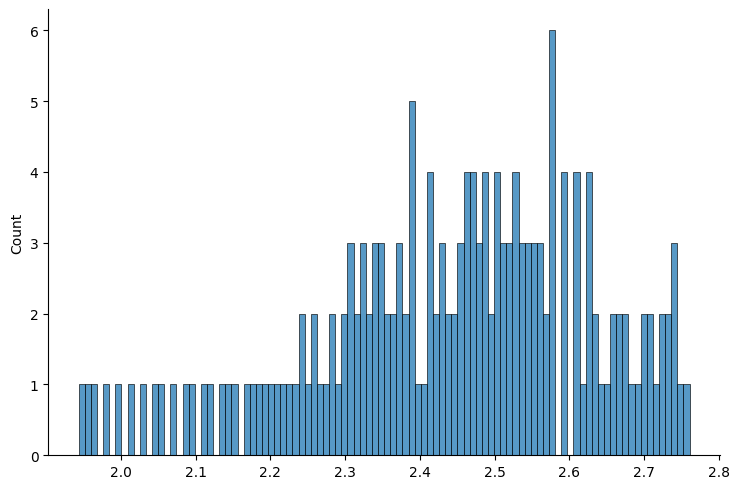

In [6]:
print("cases SC")
sns.displot(data=cases_norm_SC, x=cases_norm_SC, kind='hist', bins=100, aspect=1.5)
plt.show()

deaths SC


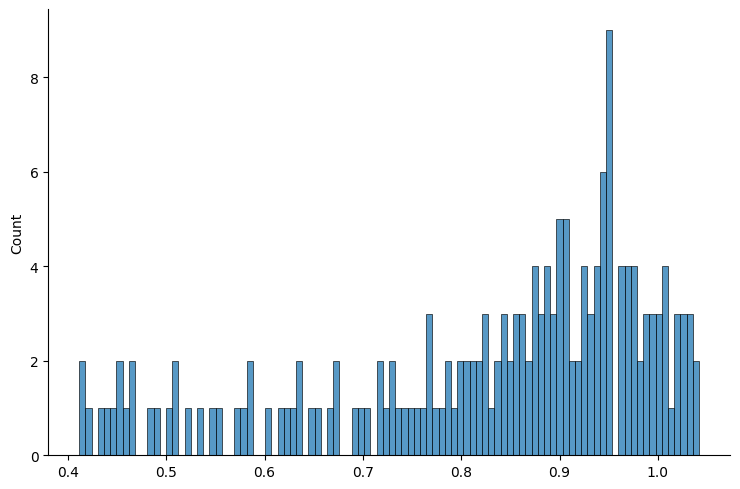

In [7]:
print("deaths SC")
sns.displot(data=deaths_norm_SC, x=deaths_norm_SC, kind='hist', bins=100, aspect=1.5)
plt.show()

cases AL


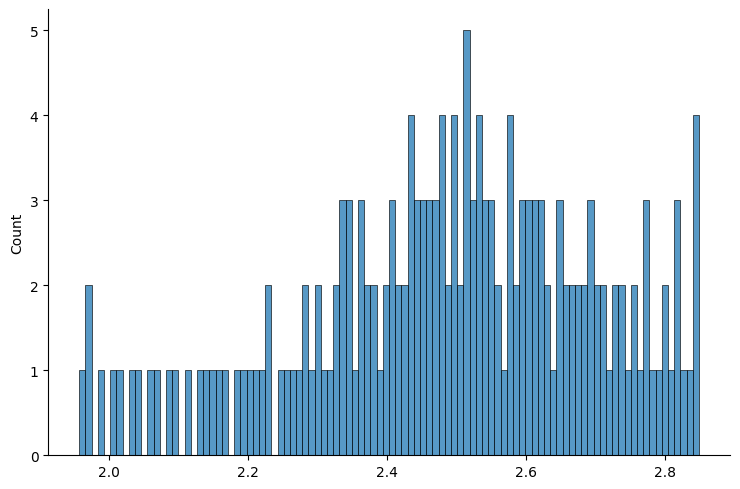

deaths AL


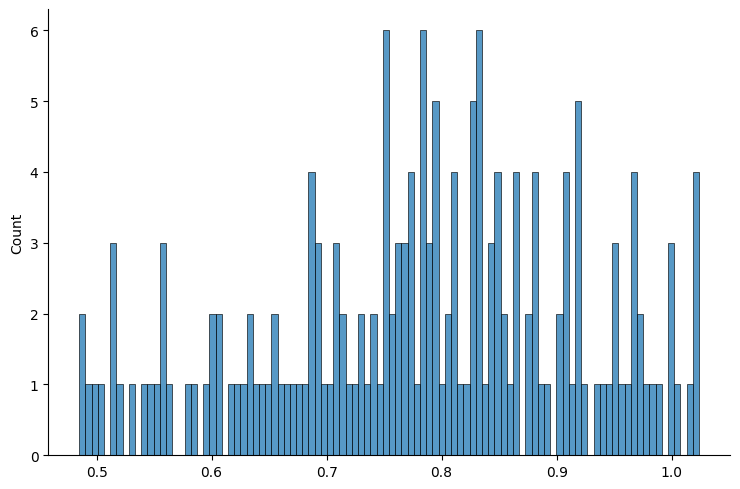

---------------------------------------------------------------------------------------------------
cases OR


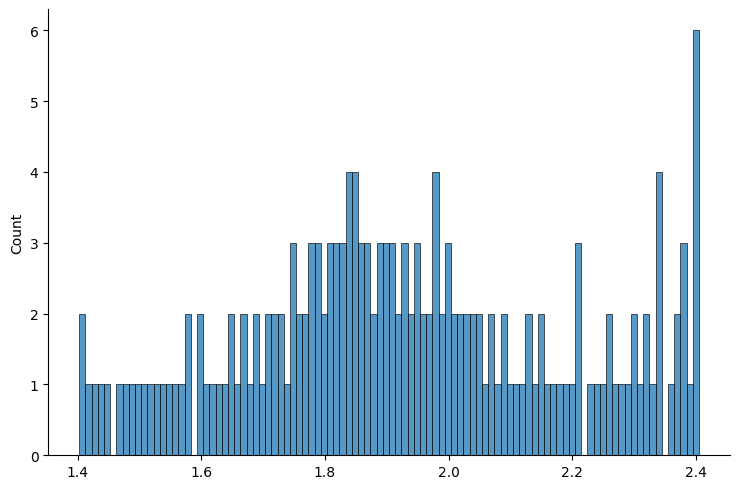

deaths OR


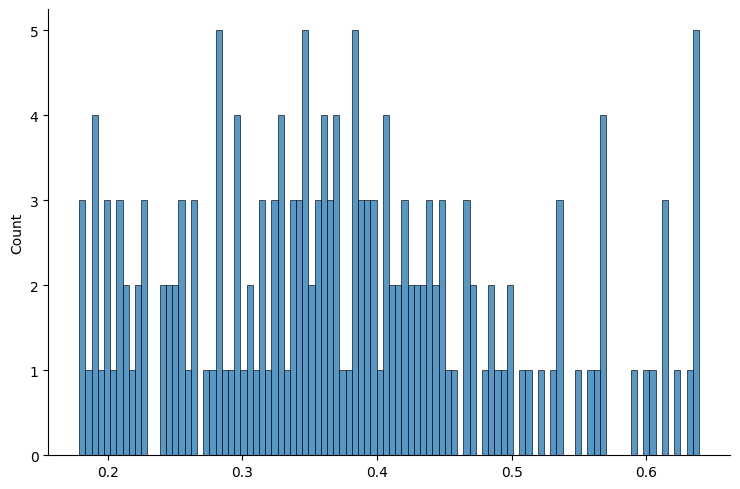

---------------------------------------------------------------------------------------------------
cases GA


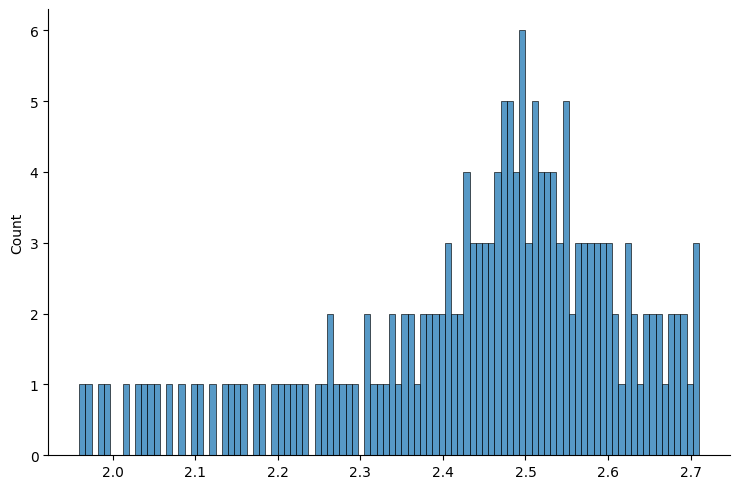

deaths GA


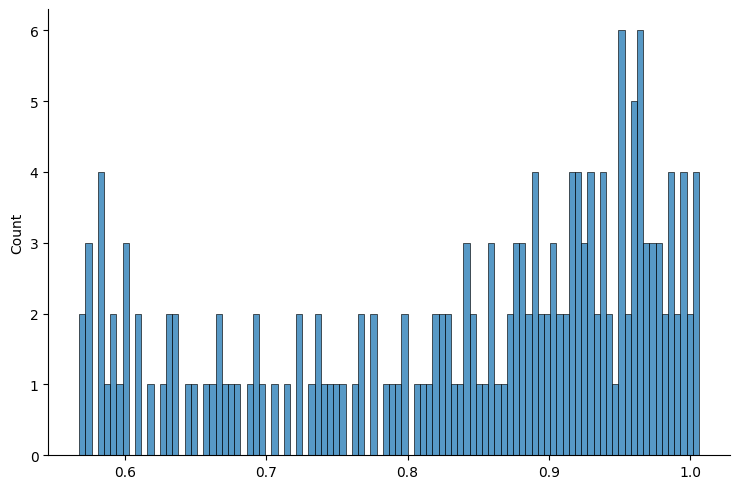

---------------------------------------------------------------------------------------------------
cases NY


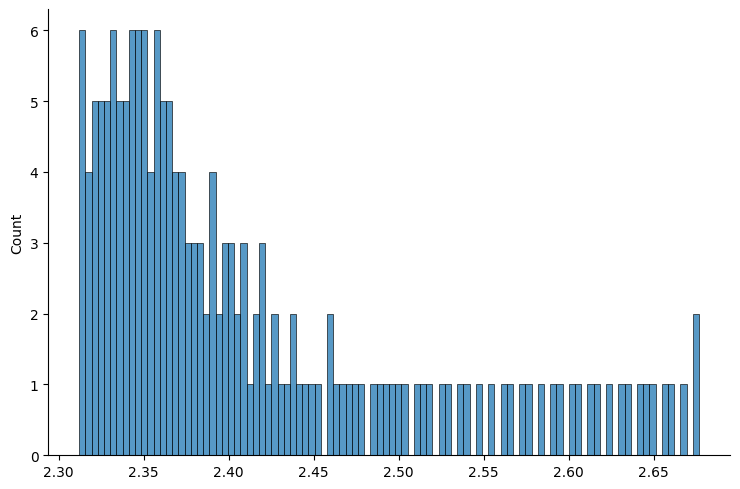

deaths NY


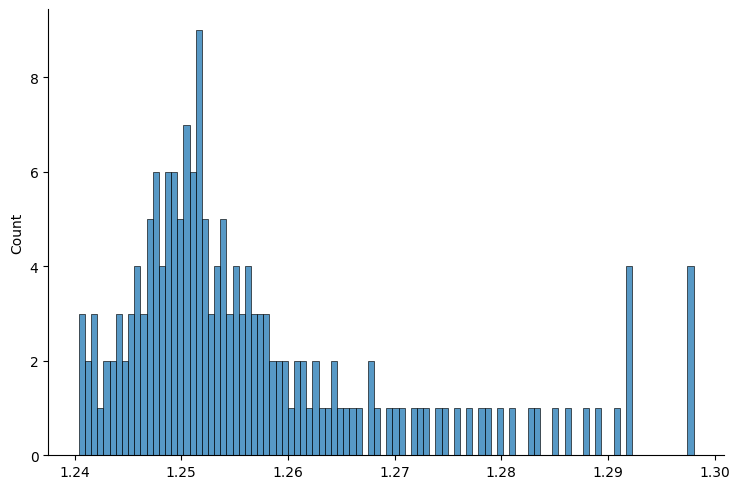

---------------------------------------------------------------------------------------------------
cases CO


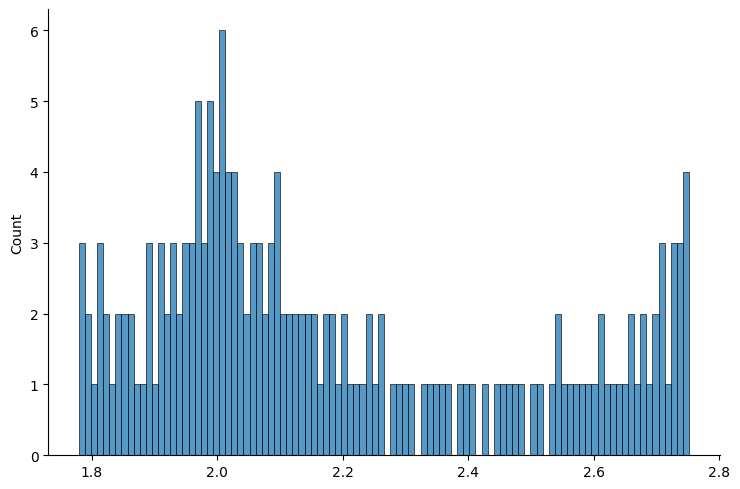

deaths CO


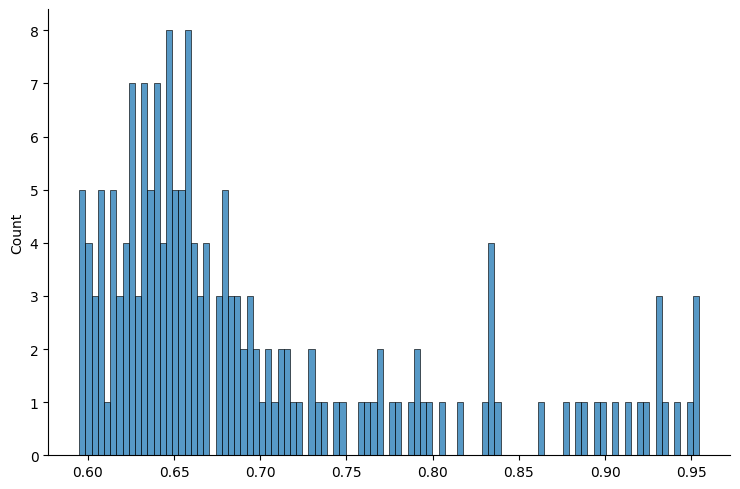

---------------------------------------------------------------------------------------------------


In [10]:
states = ['AL', 'OR', 'GA', 'NY', 'CO']
cases_stats_list = []
deaths_stats_list = []
pop_sum_list = []

for i in range(len(states)) :
    pop = population.loc[population["State"] == states[i]]
    pop_sum_list.append(pop['population'].sum())

    cases_dates = parse_datetime_state(cases, states[i])
    deaths_dates = parse_datetime_state(deaths, states[i])
    cases_stats_list.append(get_statistics(cases_dates))
    deaths_stats_list.append(get_statistics(deaths_dates))
    cases_norm = ((cases_dates/(pop_sum_list[i]/norm_factor)).sum(axis = 0) + 1).agg(np.log10)
    deaths_norm = ((deaths_dates/(pop_sum_list[i]/norm_factor)).sum(axis = 0) + 1).agg(np.log10)
    
    print("cases " + states[i])
    sns.displot(data=cases_norm, x=cases_norm, kind='hist', bins=100, aspect=1.5)
    plt.show()
    
    print("deaths " + states[i])
    sns.displot(data=deaths_norm, x=deaths_norm, kind='hist', bins=100, aspect=1.5)
    plt.show()
    
    print("-------------------------------------------------------" +
          "--------------------------------------------") #separator for each state

The distributions for both the cases data and deaths data for SC show one distinct peak. All moments are shown in the following cell:

In [11]:
print("CASES"
    "\nexpected: ", stats.moment(cases_norm_SC, moment=1), #expected value
    "\nvariance: ", stats.moment(cases_norm_SC, moment=2),   #variance
    "\nskewness: ", stats.moment(cases_norm_SC, moment=3),   #skewness
    "\nkurtosis: ", stats.moment(cases_norm_SC, moment=4))   #kurtosis
print("\nDEATHS"
    "\nexpected: ", stats.moment(deaths_norm_SC, moment=1), #expected value
    "\nvariance: ", stats.moment(deaths_norm_SC, moment=2),   #variance
    "\nskewness: ", stats.moment(deaths_norm_SC, moment=3),   #skewness
    "\nkurtosis: ", stats.moment(deaths_norm_SC, moment=4))   #kurtosis

CASES
expected:  0.0 
variance:  0.03573338007941591 
skewness:  -0.0036341748641114165 
kurtosis:  0.0035706857152384506

DEATHS
expected:  0.0 
variance:  0.028131521424863904 
skewness:  -0.004584338559244075 
kurtosis:  0.002320251323919198


The distribution for all states are different, with some being skewed in a different way than others. Population density could be a factor in the difference in occurrences of case numbers, as NY (a known population-dense state) has much higher starting case numbers in its histogram.

2024-03-30 11:50:22.544 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted loggamma distribution with error=39.65911)
2024-03-30 11:50:22.714 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gompertz distribution with error=39.281365)
2024-03-30 11:50:22.792 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted johnsonsu distribution with error=39.6557)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gompertz,39.281365,9.796207,19.307659,inf,0.021569,0.999993
johnsonsu,39.655700,28.073784,40.755720,inf,0.026395,0.999444
loggamma,39.659110,27.281088,36.792540,inf,0.026197,0.999512


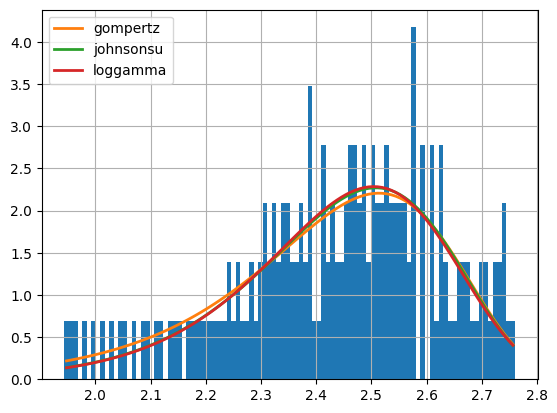

In [12]:
f = Fitter(cases_norm_SC, distributions=['gompertz', 'johnsonsu','loggamma'])
f.fit()
f.summary()
#this one found gompertz distribution method to be best

2024-03-30 11:50:23.185 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted loggamma distribution with error=91.476857)
2024-03-30 11:50:23.278 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gompertz distribution with error=114.707254)
2024-03-30 11:50:23.424 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted johnsonsu distribution with error=90.125018)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsu,90.125018,-0.459219,12.222717,inf,0.043144,0.884343
loggamma,91.476857,-7.910348,1.601104,inf,0.042297,0.897816
gompertz,114.707254,-18.696636,-9.185184,inf,0.082240,0.174867


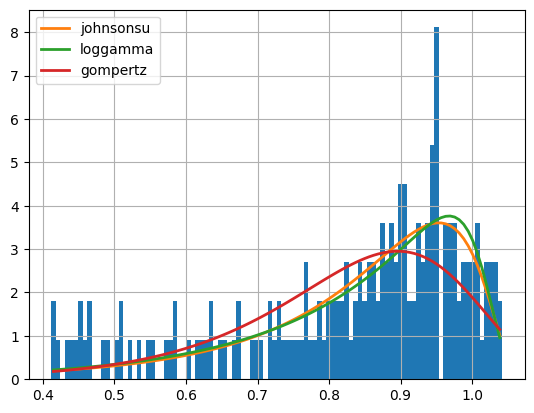

In [13]:
f = Fitter(deaths_norm_SC, distributions=['gompertz', 'johnsonsu','loggamma'])
f.fit()
f.summary()
#this one found johnsonsu distribution method to be best

### Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. Describe how the poission modeling is different from the first modeling you did. (25 points)
- For example, number of new cases and deaths per 100,000 population. 
- Hint - the parameter for a poission's distribution will be its mean value. Then for the minimum and maximum range of covid cases you are calculating probability mass function to observe the probability at different points. 

cases SC (poisson)


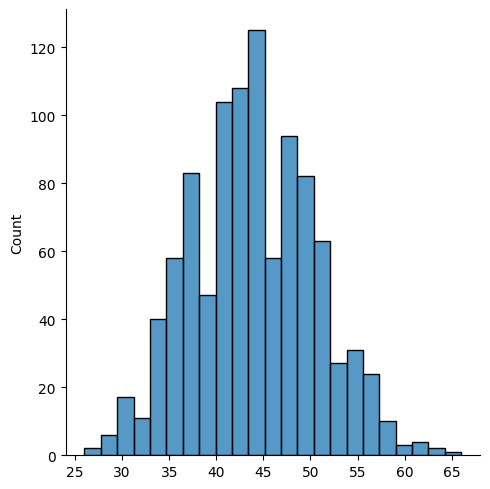

deaths SC (poisson)


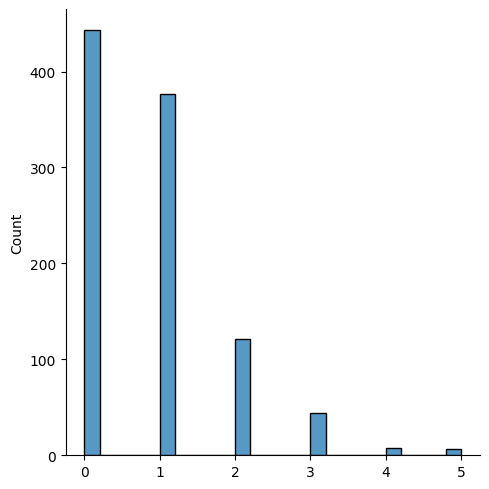

In [14]:
cases_mean_SC = ((cases_stats_SC['mean'].mean())/(pop_SC_sum/norm_factor))
deaths_mean_SC = ((deaths_stats_SC['mean'].mean())/(pop_SC_sum/norm_factor))

print("cases SC (poisson)")
sns.displot(random.poisson(lam=cases_mean_SC, size=1000), kde=False)
plt.show()

print("deaths SC (poisson)")
sns.displot(random.poisson(lam=deaths_mean_SC, size=1000), kde=False)
plt.show()

cases AL (poisson)


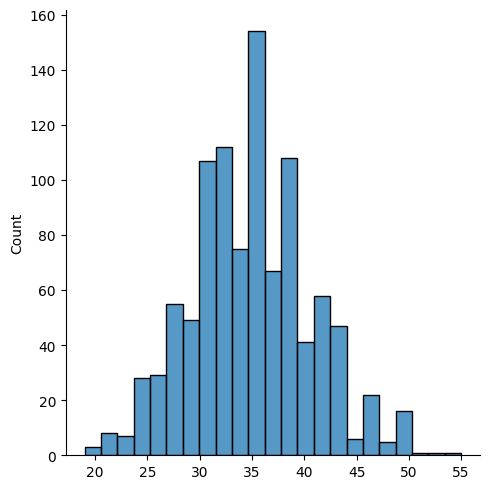

deaths AL (poisson)


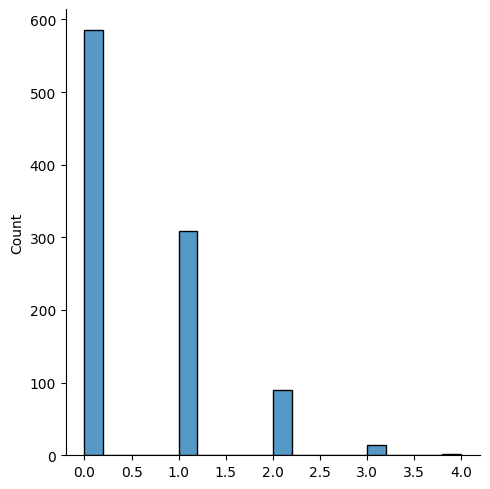

cases OR (poisson)


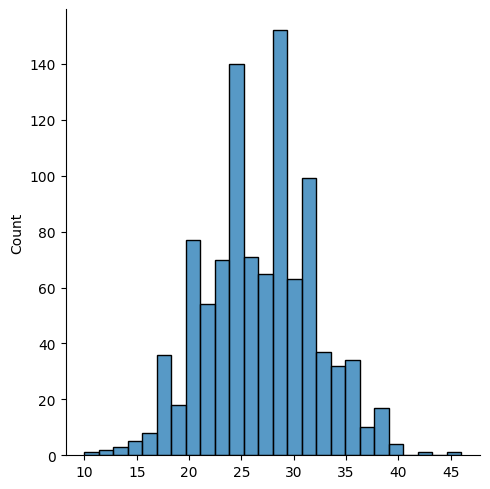

deaths OR (poisson)


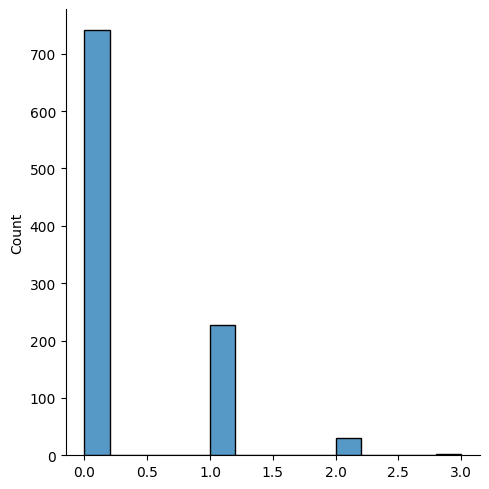

cases GA (poisson)


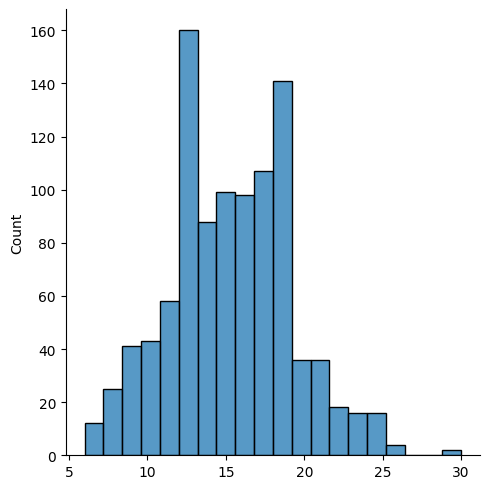

deaths GA (poisson)


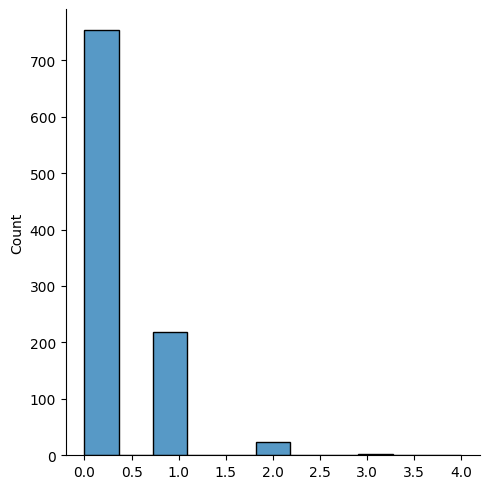

cases NY (poisson)


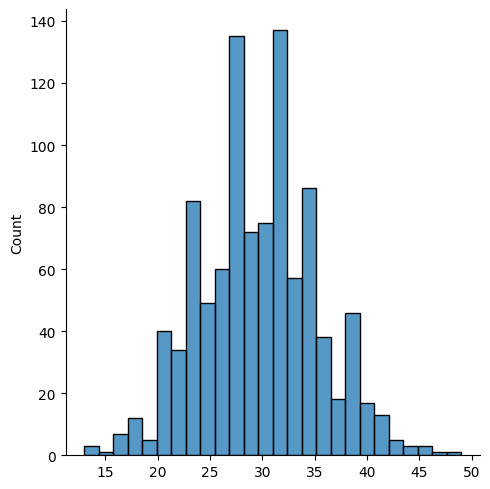

deaths NY (poisson)


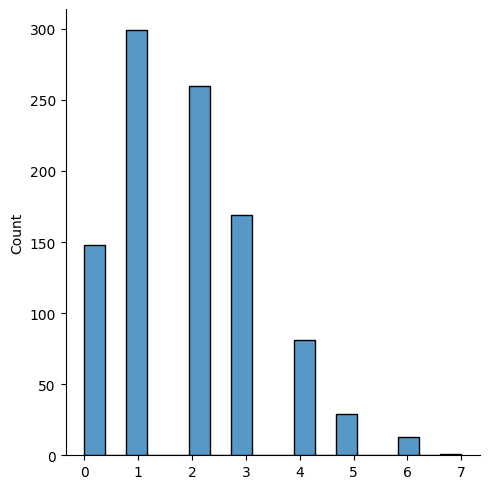

cases CO (poisson)


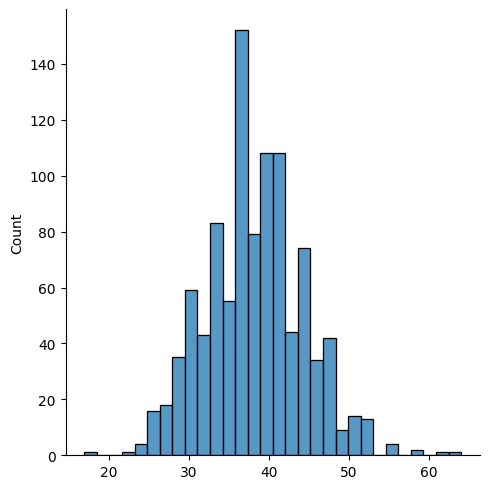

deaths CO (poisson)


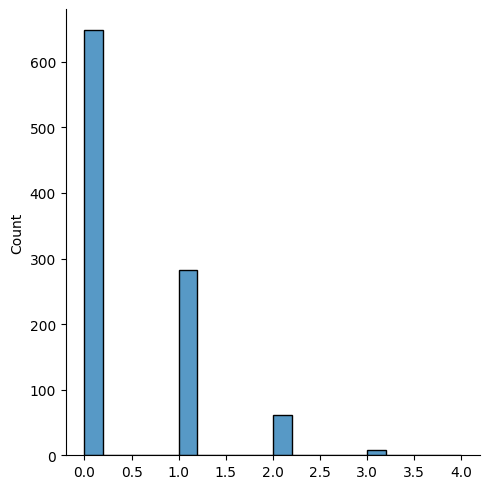

In [15]:
for i in range(len(states)) :
    cases_mean = (cases_stats_list[i]['mean'].mean())/(pop_sum_list[i]/norm_factor)
    deaths_mean = (deaths_stats_list[i]['mean'].mean())/(pop_sum_list[i]/norm_factor)
    
    print("cases " + states[i] + " (poisson)")
    sns.displot(random.poisson(lam=cases_mean, size=1000), kde=False)
    plt.show()
    
    print("deaths " + states[i] + " (poisson)")
    sns.displot(random.poisson(lam=deaths_mean, size=1000), kde=False)
    plt.show()

The distribution for cases data becomes much more normal in poisson distribution than the previous one. However, the deaths data is much more skewed in the poisson distribution than its previous one.

### Perform correlation between Enrichment data valiables and COVID-19 cases to observe any patterns. (20 points)
- You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based covid data to enrichment data for correlation. Between states you would need to aggregate to state level data and then perform correlation. Both covid and enrichment data will need to be normalized for population. For number of covid cases you can use a measure of center value (median or mean) to compare the number of cases. 

In [16]:
employment = pd.read_csv("Employment/Merge_Covid_Employment.csv")
covid = employment.loc[:, "2020-07-05_cases":"2020-12-27_cases"]
covid["State"] = employment["State"]
covid["County Name"] = employment["County Name"]
employment.drop(employment.iloc[:,4:2537], axis=1, inplace=True)
employment = employment.dropna(axis=0)
covid = covid.dropna(axis=0)
#working with 2021 data here, so we can drop 2020 and 2022
employment = employment[employment.columns.drop(employment.filter(regex='2020'))]
employment = employment[employment.columns.drop(employment.filter(regex='2022'))]

C:\Users\leapi\AppData\Local\Temp\ipykernel_15244\2150749780.py:1: DtypeWarning: Columns (1,2,3,1270,2537) have mixed types. Specify dtype option on import or set low_memory=False.
  employment = pd.read_csv("Employment/Merge_Covid_Employment.csv")


In [19]:
state = 'SC'
norm_factor = 10000

pop_SC = population.loc[population["State"] == state]
pop_SC_sum = pop_SC['population'].sum()
cov = covid.loc[covid["State"]==state]
emp = employment.loc[employment["State"]==state]
emp = emp.iloc[2:,:] #Statewide Unallocated shows up twice in each dataset. take both out
cov = cov.iloc[2:,:]

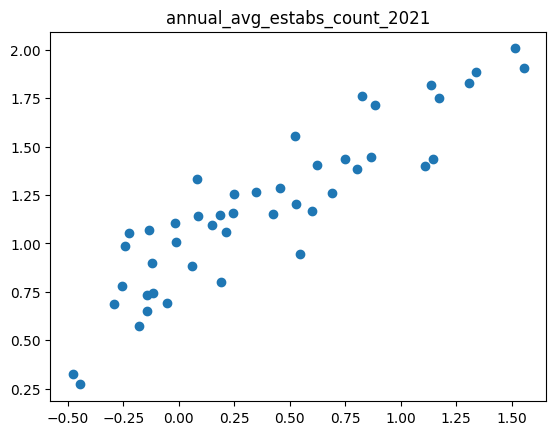

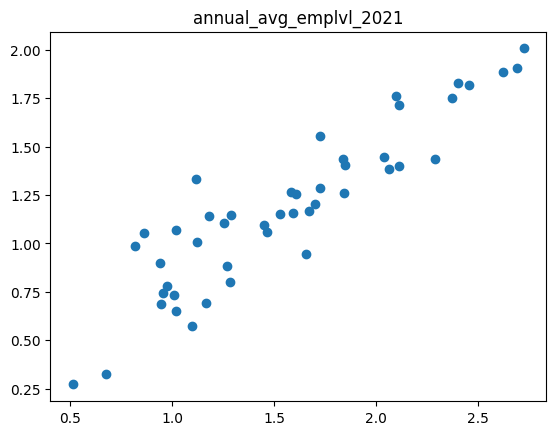

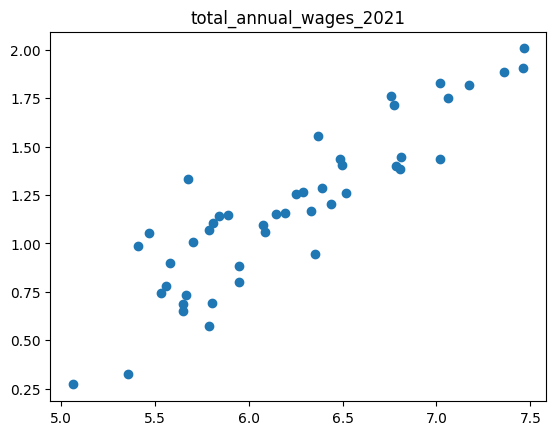

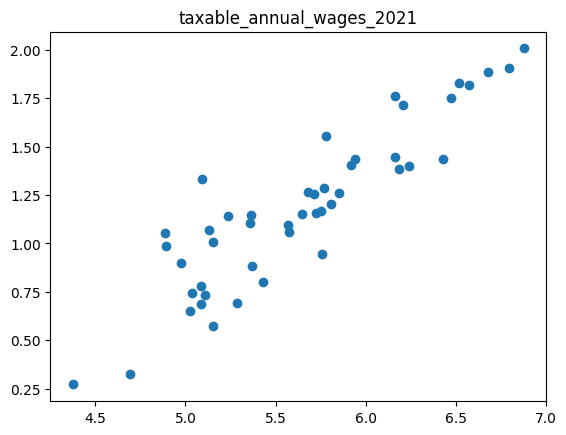

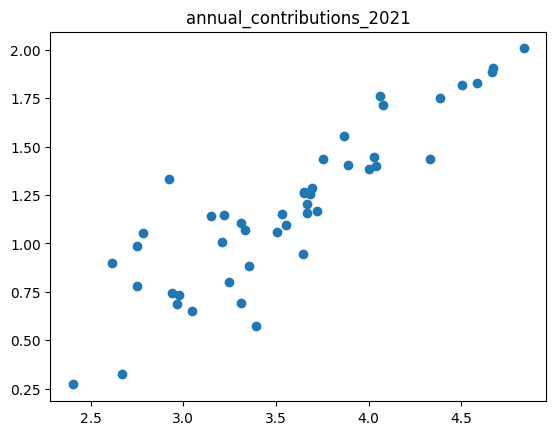

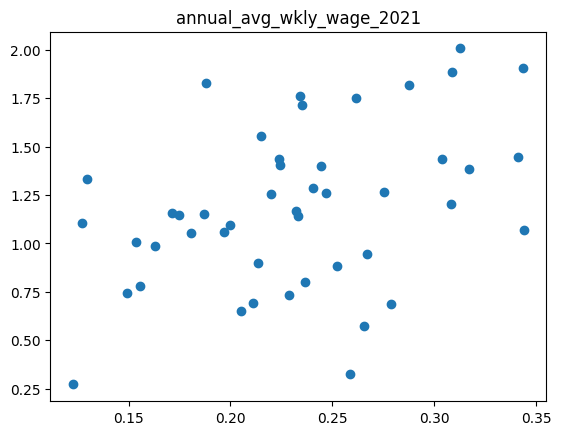

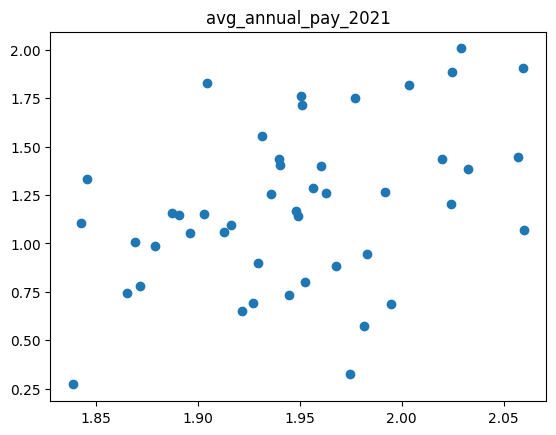

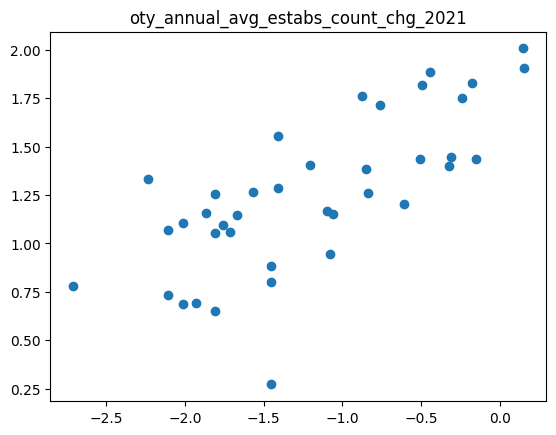

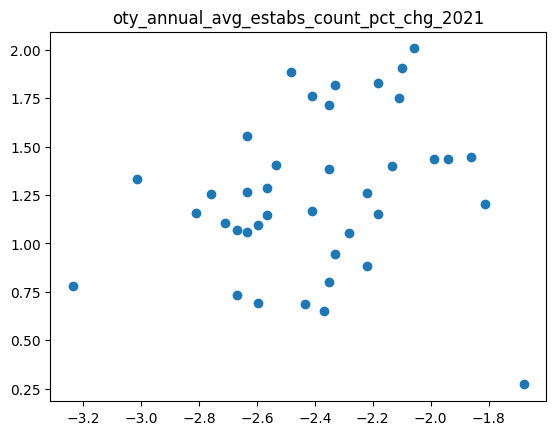

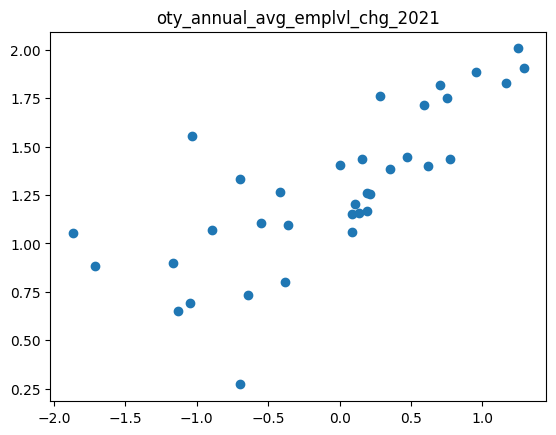

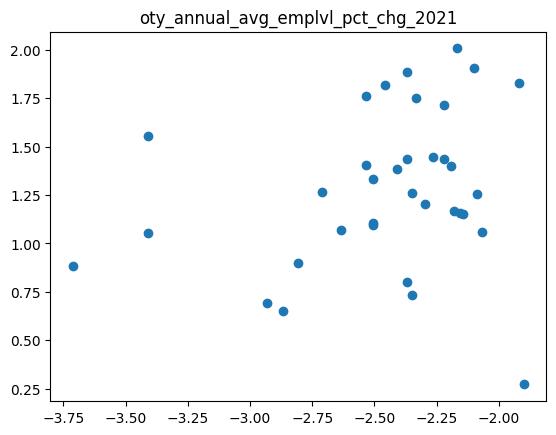

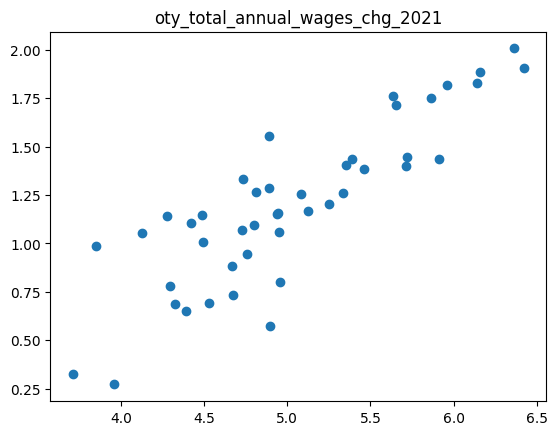

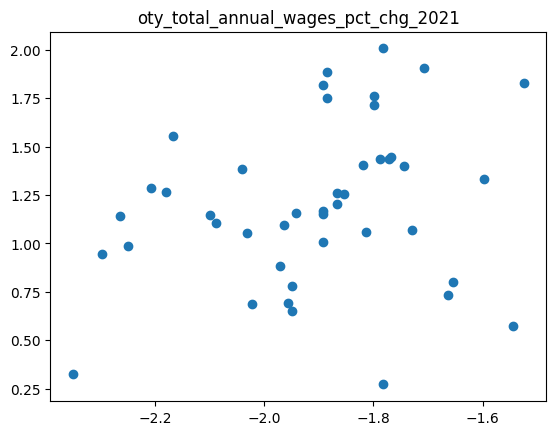

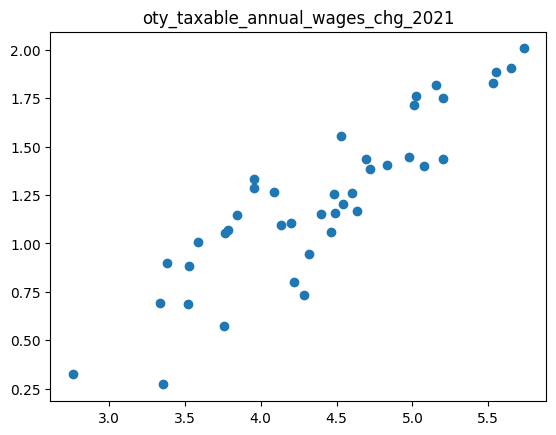

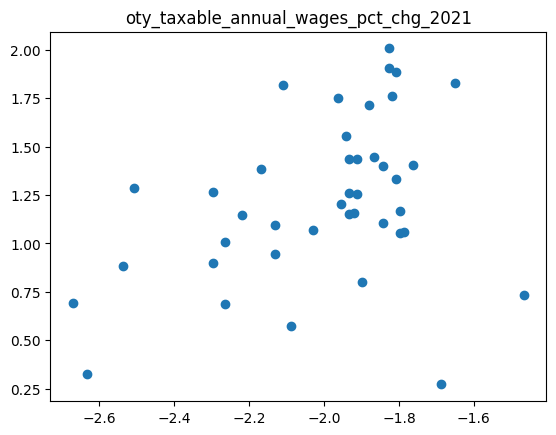

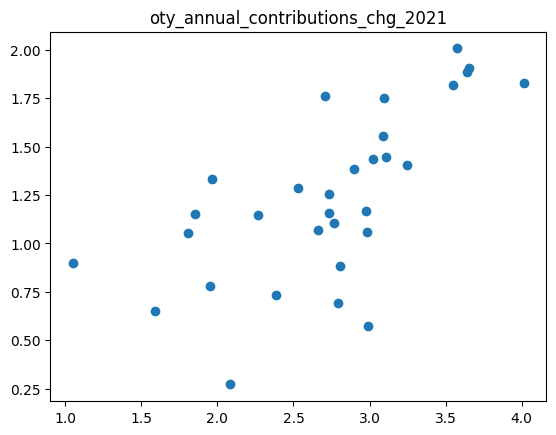

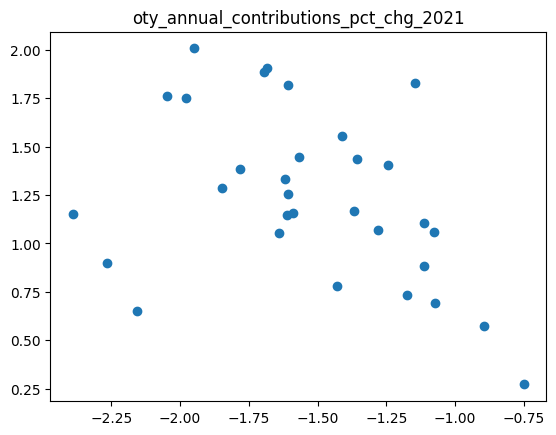

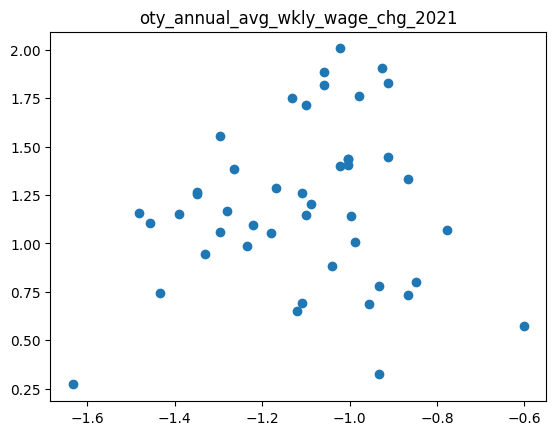

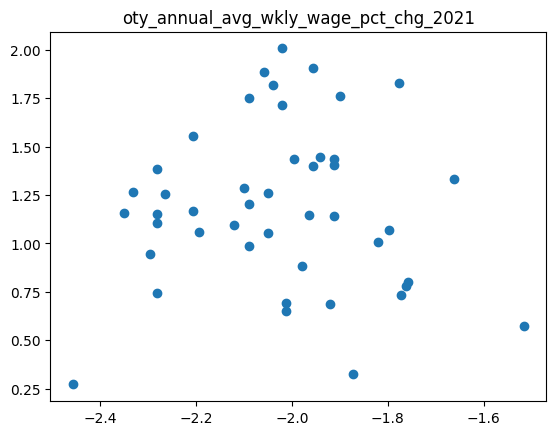

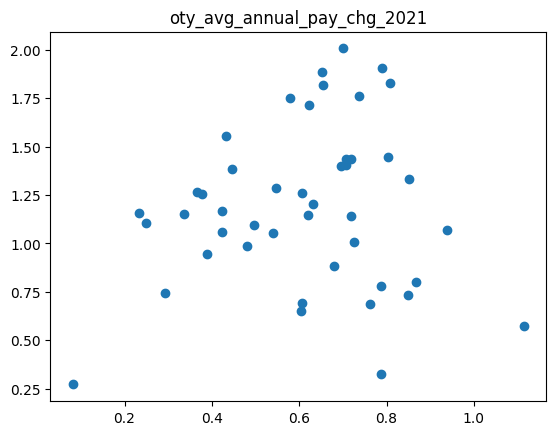

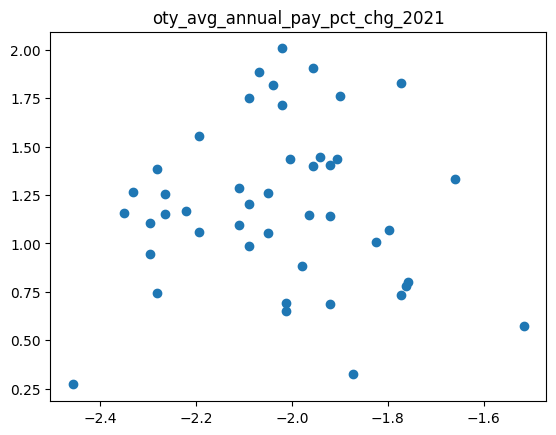

In [20]:
#normalize and plot correlations between each employment variable and covid case numbers
cov_norm = (cov.iloc[:,0:176]/(pop_SC_sum/norm_factor)).sum(axis=1).agg(np.log10)
emp_norm = []
start_index = 8 #index for numerical data starts here
for i in range(len(emp.columns)-start_index) :
    emp_norm.append((emp.iloc[:,i+start_index]/(pop_SC_sum/norm_factor)).agg(np.log10))
    plt.scatter(emp_norm[i], cov_norm)
    plt.title(emp.columns[i+start_index])
    plt.show()

### Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against. (30 points)
- For example: *Does higher employment data lead to higher covid case numbers or more rapid increase in covid cases.* 

Employment level, taxable annual wages, and establishments count in South Carolina all show strong positive correlation to numbers of covid-19 cases. Because of this, I hypothesize that: each of these variables lead to higher numbers of cases in all states.

- Higher employment level leads to higher numbers of cases in all states
- Higher taxable annual wages lead to higher numbers of cases in all states
- Higher establishments counts lead to higher numbers of cases in all states